In [67]:
import xtools as xt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from atm.flight.flight import DUMMY_FLIGHT_RECAT
from atm.flight.scenario import ScenarioGenerator
from atm.separation import recat

In [12]:
config_name = "config.yaml"
cf = xt.Config(config_name)

In [61]:
sgen = ScenarioGenerator(cf.scenario)
vols = sgen(10)
dvols = vols.to_dataframe()

In [62]:
separation = recat.TBS

In [63]:
last_vol = DUMMY_FLIGHT_RECAT
last_time = last_vol.ready
assign_times = []
separations = []
for vol in vols:
    sep = separation(last_vol, vol)
    time = np.max([last_time + sep, vol.ready])
    assign_times.append(time)
    separations.append(sep)

    last_vol = vol
    last_time = time
dvols["assign"] = assign_times

In [64]:
dvols

,code,ready,due,category,operation,assign
0,VOL0001,116,416,A,A,116
1,VOL0002,187,487,B,D,219
2,VOL0003,251,551,A,D,292
3,VOL0004,266,566,C,D,421
4,VOL0005,347,647,D,D,511
5,VOL0006,461,761,F,A,659
6,VOL0007,532,832,F,A,757
7,VOL0008,570,870,C,A,839
8,VOL0009,644,944,A,A,914
9,VOL0010,654,954,C,D,1043


In [65]:
separations = separations[1:]
separations

[103, 73, 129, 90, 148, 98, 82, 75, 129]

(0.0, 1143.0)

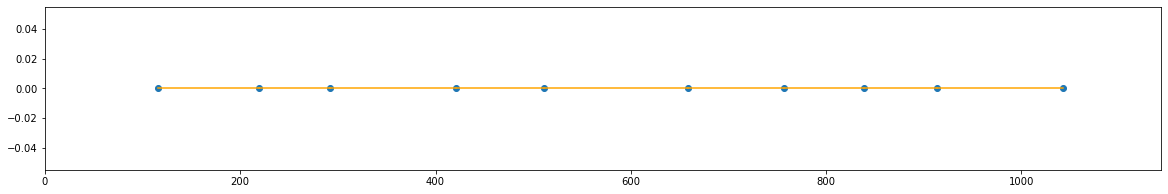

In [66]:
fig, ax = plt.subplots(figsize=(20, 3))
for i, sep in enumerate(separations):
    time_de = assign_times[i]
    time_to = assign_times[i] + sep
    ax.plot([time_de, time_to], [0,]*2, c="orange")
ax.scatter(x=assign_times, y=[0,]*len(assign_times))
ax.set_xlim([0, max(assign_times)+100])